In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

A machine learning model that is trained on California Housing Prices dataset from the StatLib repository.

We are doing supervised learning here on House Prices datatset and our aim is to do predictive analysis

During our journey we’ll understand the important tools needed to develop a powerful ML model

Our model will help us in predicting future housing prices.

We’ll validate it against our test dataset

# 1.Understand the requirements of the business

1. Why does our organisation need this predictive model?

- possibly we are a real-estate firm and interested in investing in California

- the organisation will use this data to feed another machine learning model

- current process is good but manual and time consuming

- our organisation wants an edge over competition

- we are a consulting firm in the real-estate business and this data is valuable

2. We need to understand what are we doing at the root level

- We’ll train our model on existing data so we are doing supervised learning

- Since we need to predict housing prices i.e., on continuous data, we are doing regression

- Output depends on many parameters so we are doing multivariate-regression

# 2. Acquire the dataset

In [21]:
df = pd.read_csv("E:\End to End Projects\Data Sets\housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


1. This data has metrics such as the population, median income, median housing price, and so on for each block group in California.
2. A blockgroup typically has a population of 600 to 3,000 people.

3. We will just call them “districts” for short.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 3. Visualize the Data

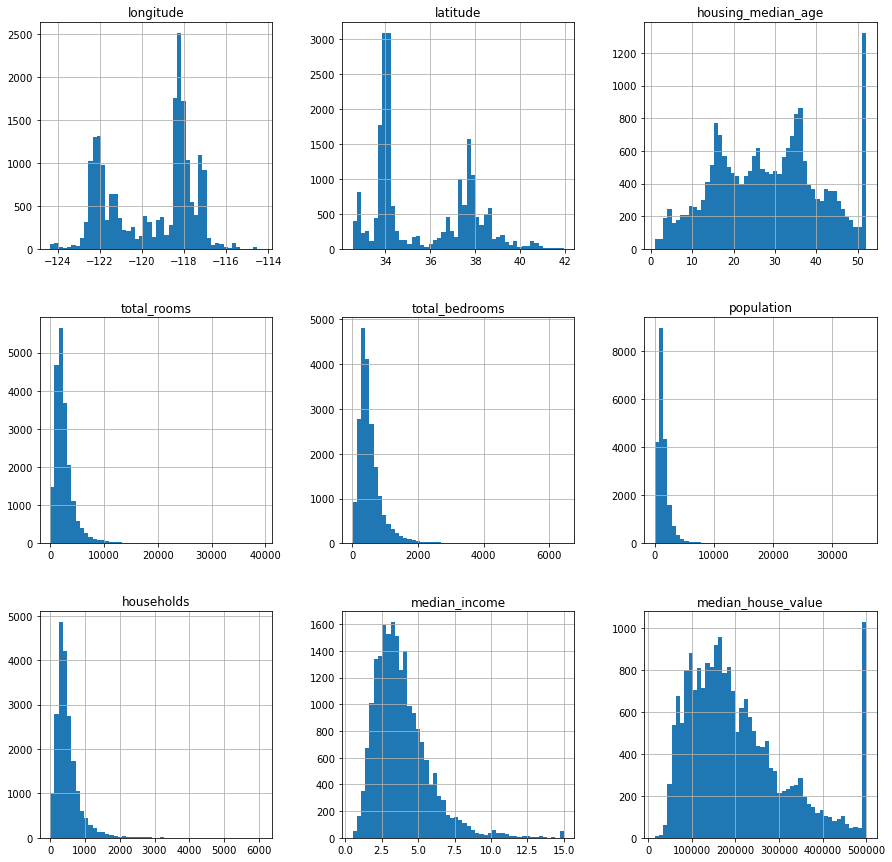

In [23]:
df.hist(bins=50, figsize=(15,15))
plt.show()

Great! We are seeing each feature of our data-set as a histogram.

longitude — the same, at -122 and -118 degrees are major houses

latitude — looks correct, at 34 and 37 degrees of latitude are major houses.

housing median age — well, not very bell-shaped, at 35 and 15 are two peaks. are these years? max peak is at 50. does this mean major houses in each district are more than 50 years old?!?

total rooms — again similar to the previous two. most districts have around 3000 rooms

bedrooms — hmm, we have got bedrooms for a district? looks like most districts have between 300–600 bedrooms

population — most districts have population below 3000

households — hmm, most districts have around 100–500 households. peak is around 4800

median income — very bell-shaped, good distribution, but is this income in dollars? There is no income above 15 so some capping has been done. most people have income between 2–5

median house value — hmm, this is what i need to predict. somewhat bell-shaped, at extreme right there is a surge, is y-axis dollars? does this mean most houses are above 500,000?

# 4. Pre-process the data

Say some expert tells us that median income is a very important parameter to find out housing prices. We observe that the median income data is continuous. So let’s make it discrete

In [24]:
df['income_cat'] = np.ceil(df['median_income']/1.5)

In [25]:
df['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [26]:
df['income_cat'].where(df['income_cat']<5, 5.0, inplace=True)

In [27]:
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

Now based on income categories, we’ll split our entire data into

80% for training our model

20% for testing our model

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

We are using stratified sampling technique here since we derived a new attribute called income category.

In [29]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [30]:
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [31]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3.0


now we need to remove the income category from our training and test data sets

In [32]:
strat_train_set.drop(['income_cat'], axis=1, inplace=True)
strat_test_set.drop(['income_cat'], axis=1, inplace=True)

Lets create a copy of our taining dataset and visualise it using a Scatter plot

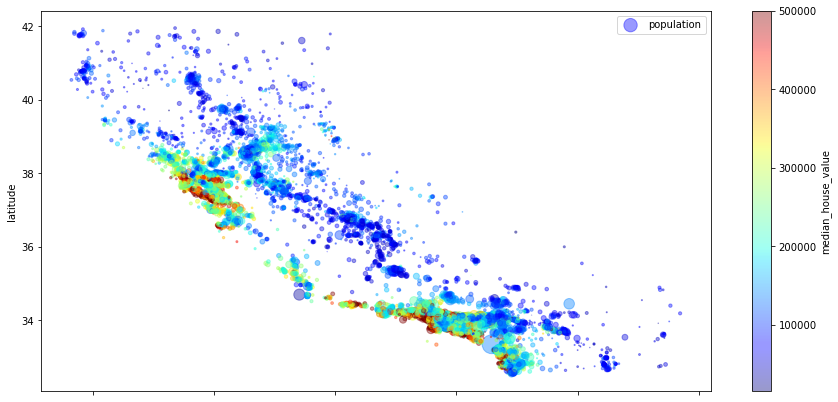

In [33]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha=0.4, s=housing['population']/100, 
            label = 'population', c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar=True, figsize=(15,7))
plt.legend()
plt.show()

The radius of each circle represents the district’s population (option s)

The color represents the price (option c)

We use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

# Correlation

also known as the Pearson coefficient

its a value between +1 and -1

+1 means two attributes are highly positively correlated

0 means two attributes are not at all correlated

-1 means two attributes are highly inversely correlated

the correlation coefficient only measures linear relationships

Let’s find out if there is correlation between our attributes using scatter_matrix method

Scatter_matrix plots every attribute with every other attribute. We’ll pass the attributes that we think are important like this…

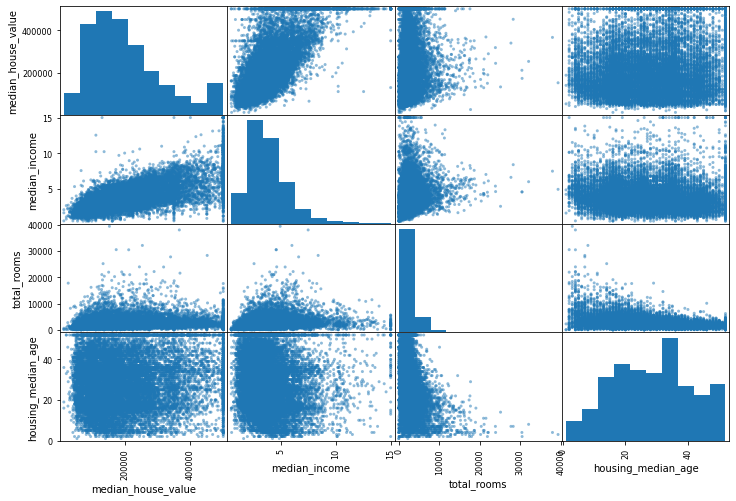

In [34]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

We’ll focus on the correlation between median house value and the median house income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

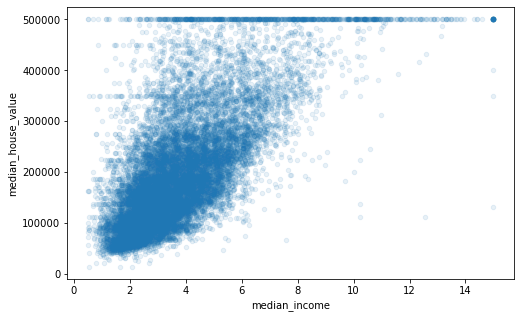

In [35]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha=0.1, figsize=(8,5))

This is good correlation
We see a horizontal line at the top which marks the upper capping
Some horizontal lines in the middle too
We got a good idea about correlation in our dataset. Let’s move on

In [36]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND


See these three attributes above? => total_rooms, total_bedrooms, population
They are for an entire district. It would be nice to find them for a household. Why?

We are calculating per house price. Correct?
So let’s do that
So basically we are deriving new attributes from existing attributes in our dataset

In [37]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [38]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333


Now

let’s find out the correlation of our entire dataset and find out which one is most related to median house value.

In [39]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [40]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Data Cleaning

Let’s create a fresh training dataset and make some concepts clear

housing — this is the chunk we’ll feed to our model to learn

housing_labels — this is our target price in our training dataset which our model should learn

In [41]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [42]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [43]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

Do you remember in the start our total_bedrooms had some missing values?

We can fix this in 3 ways

remove the instances(rows) of missing values

remove the entire attribute

set missing value to some value like zero, median or mean

We’ll take option 3 and put in the median value using the SimpleImputer method like this

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# Piplines

In machine learning we repeat certain procedures like

To save time we can join these chunks and form a solid pipeline! So anytime if

we just run our pipeline. Cool isn’t it?

This is one of the most difficult part in our project. To achieve this we will

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

# this component gives us the flexibility to add extra attributes to our pipeline

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
# this component allows us to select entire or partial dataFrame
# or in simpler words we can tell which attributes we want in our pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

### Label Binarizer converts

text to integers

integers to one hot vectors

think of one hot vectors as an array which has all 0’s but only one 1!

In [47]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
        
    def fit(self, X, y=0):
        self.encoder.fit(X)
        return self
    
    def transform(self, X, y=0):
        return self.encoder.transform(X)

Great!

Our individual components are done!

Let’s separate our numerical and categorical attributes and then

Let’s define our final pipeline like this

In [48]:
num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attr = attr_adder.transform(housing.values)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

Let’s add components to our numerical pipeline. Those will be

DataFrameSelector — to chose the attributes we want

SimpleImputer — to fill NA values with median

CombinedAttributesAdder — Our custom class to add new attributes to our model

Std Scaler — to bring all attributes to the same level.

In [54]:
# our numerical pipeline

num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attr)),
                    ('imputer', SimpleImputer(strategy='median')),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler())
                ])

Similar procedure for our categorical pipeline. The label binarizer converts categorical labels to numerical data.

In [55]:
# our Categorical Pipeline

cat_pipeline = Pipeline([
                    ('selector', DataFrameSelector(cat_attr)),
                    ('label_encoder', MyLabelBinarizer())
                ])

The components of our full pipeline are pipelines themselves! This is powerful and complex.

In [56]:
# our full pipeline

full_pipeline = FeatureUnion(transformer_list = [
                        ('num_pipeline', num_pipeline),
                        ('cat_pipeline', cat_pipeline),
                ])

Shall we prepare our entire training dataset with our pipeline? Here we get our full transformed data after passing through the full pipeline.



In [57]:
housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

We have come a long way. So where are we now in our project?

we acquired our dataset, 
studied and understood it, 
visualized it, 
split it into train and test, 
made our pipelines, 
transformed our housing data, 
So now we have our data all ready and prepared to be fed to an ML model



# 5. Try various ML models and train them

So which model to choose?

Well this will come by practice and I am equally confused as you.
Lets do 3-4 popular models

### A. Linear Regression with K-fold cross validation

In K-fold cross validation, say we chose k=10 then

it divides our training data into 10 folds
trains and evaluates a Linear Regression model 10 times
result is an array of 10 scores

In [59]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [61]:
from sklearn.model_selection import cross_val_score

cross_val_score class accepts our regression model, the training and target data, a scoring method — we are using the negative mean squared error and the cv parameter is 10 fold cross validation

In [62]:
scores = cross_val_score(linear_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)

Since scores contains negative values we find the rmse like this…

In [65]:
# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

Let’s print the mean and standard deviation of the scores

In [66]:
print('Mean:\t\t', rmse_scores.mean(), '\nStandard Deviation:', rmse_scores.std())

Mean:		 69104.07998247063 
Standard Deviation: 2880.328209818065


### Ok. We got some output.

#### But how do we know how good is this model?

by finding the root mean squared error between predictions and actuals
It measures the standard deviation of the errors the system makes in its predictions.
For example, an RMSE of 50,000 means that about 68% of the system’s predictions fall within 50,000 of the actual value
and about 95% of the predictions fall within 100,000 of the actual value.

#### Hmmm….What conclusions can we draw?

note that our median_housing_values lie with 120,000 and 265,000
so a typical prediction error of $69,052 with ±2731 is not very satisfying.
This is an example of a model under-fitting the training data.
When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough

### Decision Tree Regressor with K-fold cross validation

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
DTR = DecisionTreeRegressor()

scores = cross_val_score(DTR, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

scores

array([-5.40649495e+09, -4.90107450e+09, -4.73693872e+09, -4.95870260e+09,
       -5.07951639e+09, -5.96142353e+09, -4.78545065e+09, -5.37970192e+09,
       -4.67777803e+09, -4.88534934e+09])

In [68]:
rmse_scores = np.sqrt(-scores)

In [69]:
print('Mean\t\t:', rmse_scores.mean(), '\nStandard Deviation:', rmse_scores.std())

Mean		: 71207.39662503326 
Standard Deviation: 2598.02416211066


Conclusion

We have error of 70684 with ±2419.
Our decision tree model is performing a little worse than our linear regression model
Let’s move on

### Ensemble Learning — Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RFR = RandomForestRegressor()
RFR.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [71]:
forest_scores = cross_val_score(RFR, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
forest_scores

array([-2.63725504e+09, -2.38176849e+09, -2.17922818e+09, -2.70067084e+09,
       -2.23149694e+09, -2.68056074e+09, -2.77961116e+09, -2.47852565e+09,
       -2.33471296e+09, -2.89689432e+09])

In [72]:
RTR_rmse_scores = np.sqrt(-forest_scores)

In [73]:
print('Mean\t\t:', RTR_rmse_scores.mean(), '\nStandard Deviation:', RTR_rmse_scores.std())

Mean		: 50246.909856203034 
Standard Deviation: 2306.6170545815726


Conclusion

We have prediction error of 50239 with +/- 2166

Building a model on top of other model is called Ensemble learning

In [74]:
from xgboost import XGBRegressor
XGB = XGBRegressor()


In [75]:
XGB_scores = cross_val_score(XGB, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
XGB_scores

array([-2.45512940e+09, -2.07764868e+09, -1.92192137e+09, -2.47877770e+09,
       -2.18427003e+09, -2.12006813e+09, -2.36962601e+09, -2.08255322e+09,
       -2.06534975e+09, -2.53462236e+09])

In [76]:
XGB_rmse_scores = np.sqrt(-XGB_scores)

In [77]:
print('Mean\t\t:', XGB_rmse_scores.mean(), '\nStandard Deviation:', XGB_rmse_scores.std())

Mean		: 47164.28714316354 
Standard Deviation: 2127.6002793597445


Conclusion

We have prediction error of 47164 with +/- 2127

XG Boost looks very promising and performs the best out of the all

We should save data from all the models for our reference

# 6. Fine tune our model with Hyper parameters

We can do optimization on our model by tweaking Hyper-parameters
Think of hyper parameters as “knobs” that you turn to optimize output
We can do it manually but we’ll use an automatic scikit learn GridSearchCV tool for this
We’ll apply it on our XGBoost model

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate': [0.001,0.01, 0.1], 'max_depth': [3,5,7,8], 'n_estimators':[30,50,80], 'subsample':[0.5,0.7,1]}
]

In the first row of param_grid we are saying to try 3 X 4 = 12 combinations

In the second row we are saying to try 2 X 3 = 6 combinations with bootstrap false

So in all we do 12 + 6 = 18 combinations

We’ll do a cross-validation(cv) of 5 folds. See below

In [89]:
XGB = XGBRegressor()

grid_search = GridSearchCV(XGB, param_grid, cv=5, scoring = 'neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

We can find the best estimator from grid search like this. The trailing underscore is for parameters that the model has learnt.

In [90]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=80, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

from the above we can see that the combination is max_depth=8, n_estimators=80, learning_rate=0.1

Now lets try to visualize this a bit

In [93]:
cv_res = grid_search.cv_results_

print('{}\t\t{}\n'.format('Mean Score', 'Parameters'))

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    
    X=np.sqrt(-mean_score)
    y = params
    print('{:.2f}\t {}'.format(X, y))

Mean Score		Parameters

230859.34	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.5}
230858.64	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.7}
230854.03	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1}
226776.80	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
226778.96	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
226774.57	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
220825.39	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 80, 'subsample': 0.5}
220825.12	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 80, 'subsample': 0.7}
220824.17	 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 80, 'subsample': 1}
230729.90	 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 30, 'subsample': 0.5}
230725.29	 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 30, 'subsample

look for the minimum value

I’m getting at 46952 with 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 80, 'subsample': 1

without fine-tuning we had got 47164 so there has been improvement

### Great we’ve successfully fine-tuned our model!
Evaluate your model on the test set

We have a system that performs sufficiently well.
Now is the time to evaluate the final model on the test set.
We get the predictors and the labels from our test set, run our full_pipeline to transform the data
Call transform(), not fit_transform(), and evaluate the final model on the test set

Let’s get started

In [94]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [95]:
#we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

Lets do some predictions 

In [98]:
final_predictions = final_model.predict(X_test_prepared)

Let’s see how good our model is by finding the error

In [100]:
from sklearn.metrics import mean_squared_error
#find mean squared error
final_mse = mean_squared_error(y_test, final_predictions)
#find the root mean squared error
final_rmse = np.sqrt(final_mse)
final_rmse

45356.449964936866

Say we get an approval for our model for production. Now we need to remember

This model will become obsolete with time
So we need to write some code to maintain it
With time we also need to check the input data quality
Maybe we’ll make fresh models on newer data
I think we’ll end our project here but this is just the start.

Congratulations! We just implemented an full fledged end-to-end machine learning project